In [1]:
# import torch
from tool.darknet2pytorch import Darknet
import cv2
import matplotlib.pyplot as plt

In [2]:
cfgfile = './../cfg/yolov4.cfg'
weights = './../weights/yolov4.weights'

# Model load from Darknet cfg and weights

In [3]:
m = Darknet(cfgfile)
m.load_weights(weights)

convalution havn't activate linear
convalution havn't activate linear
convalution havn't activate linear


# Demo

In [4]:
from tool.utils import *
from tool.torch_utils import *

(576, 768, 3)
(608, 608, 3)


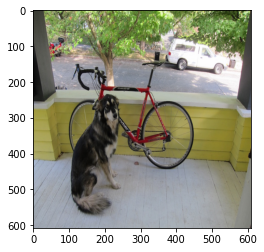

In [5]:
imgfile = './data/dog.jpg'
img = cv2.imread(imgfile)
print(img.shape)
sized = cv2.resize(img, (m.width, m.height))
sized = cv2.cvtColor(sized, cv2.COLOR_BGR2RGB)

print(sized.shape)
plt.imshow(sized)
plt.show()

In [6]:
use_cuda = 1
if use_cuda:
    m.cuda()

In [7]:
input_img = torch.from_numpy(sized.transpose(2, 0, 1)).float().div(255.0).unsqueeze(0)
input_img = input_img.cuda()

In [8]:
boxes = do_detect(m, input_img, conf_thresh=0.4, nms_thresh=0.6, use_cuda=use_cuda)

input shape :  torch.Size([1, 3, 608, 608])
model output shape :  torch.Size([1, 22743, 1, 4])
-----------------------------------
           Preprocess : 0.000215
      Model Inference : 0.202754
-----------------------------------
-----------------------------------
       max and argmax : 0.006124
                  nms : 0.000812
Post processing total : 0.006936
-----------------------------------


In [9]:
boxes

[[[0.14903378, 0.22121671, 0.74544024, 0.74030805, 0.923744, 0.923744, 1],
  [0.6038546, 0.13285464, 0.8914515, 0.29499412, 0.9179137, 0.9179137, 7],
  [0.16750929, 0.3906061, 0.4076814, 0.9398119, 0.97906077, 0.97906077, 16]]]

(x1, y1, x2, y2, conf, conf, category_id)
```py
x1 = int(box[0] * width)
y1 = int(box[1] * height)
x2 = int(box[2] * width)
y2 = int(box[3] * height)
```

In [10]:
import torch

In [11]:
torch.tensor(boxes[0]).shape

torch.Size([3, 7])

In [12]:
boxes

[[[0.14903378, 0.22121671, 0.74544024, 0.74030805, 0.923744, 0.923744, 1],
  [0.6038546, 0.13285464, 0.8914515, 0.29499412, 0.9179137, 0.9179137, 7],
  [0.16750929, 0.3906061, 0.4076814, 0.9398119, 0.97906077, 0.97906077, 16]]]

In [13]:
namesfile = 'data/coco.names'
class_names = load_class_names(namesfile)

In [14]:
output = plot_boxes_cv2(img, boxes[0], savename=None, class_names=class_names)
output = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)

bicycle: 0.923744
truck: 0.917914
dog: 0.979061


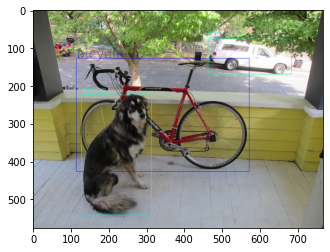

In [15]:
plt.imshow(output)
plt.show()

(576, 768, 3)
[0.16750929, 0.3906061, 0.4076814, 0.9398119, 0.97906077, 0.97906077, 16]
128 224 313 541


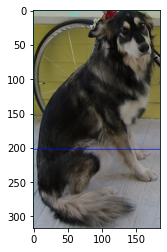

In [16]:
print(img.shape)
height, width, _ = img.shape
box = boxes[0][2]

x1 = int(box[0] * width)
y1 = int(box[1] * height)
x2 = int(box[2] * width)
y2 = int(box[3] * height)

print(box)
print(x1, y1, x2, y2)
plt.imshow(output[y1:y2, x1:x2, :])
plt.show()

In [17]:
x1, y1, x2, y2

(128, 224, 313, 541)

In [18]:
import tool.config as tools
block = tools.parse_cfg('./cfg/yolov4.cfg')
block

[{'type': 'net',
  'batch': '64',
  'subdivisions': '8',
  'width': '608',
  'height': '608',
  'channels': '3',
  'momentum': '0.949',
  'decay': '0.0005',
  'angle': '0',
  'saturation': '1.5',
  'exposure': '1.5',
  'hue': '.1',
  'learning_rate': '0.0013',
  'burn_in': '1000',
  'max_batches': '500500',
  'policy': 'steps',
  'steps': '400000,450000',
  'scales': '.1,.1',
  'mosaic': '1'},
 {'type': 'convolutional',
  'batch_normalize': '1',
  'filters': '32',
  'size': '3',
  'stride': '1',
  'pad': '1',
  'activation': 'mish'},
 {'type': 'convolutional',
  'batch_normalize': '1',
  'filters': '64',
  'size': '3',
  'stride': '2',
  'pad': '1',
  'activation': 'mish'},
 {'type': 'convolutional',
  'batch_normalize': '1',
  'filters': '64',
  'size': '1',
  'stride': '1',
  'pad': '1',
  'activation': 'mish'},
 {'type': 'route', 'layers': '-2'},
 {'type': 'convolutional',
  'batch_normalize': '1',
  'filters': '64',
  'size': '1',
  'stride': '1',
  'pad': '1',
  'activation': 'mis

# COCO

In [19]:
from pycocotools.coco import COCO
from torch.utils.data import DataLoader
from dataset_coco import COCOImage

anno_json = './../MSCOCO_ObjDet_Detail/new_coco/annotations/new_anno.json'
img_path = './../MSCOCO_ObjDet_Detail/new_coco/images/'

anno = COCO(anno_json)

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!


In [20]:
img_ids = anno.getImgIds()

In [21]:
from dataset_coco import COCOImage

In [22]:
val_set = COCOImage(anno_json, img_path, 608)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [24]:
val_loader = DataLoader(val_set, 4, shuffle=True, num_workers=0)

In [26]:
imgs, img_ids, sizes = iter(val_loader).__next__()

In [27]:
boxes = do_detect(m, imgs, conf_thresh=0.4, nms_thresh=0.6, use_cuda=use_cuda)

input shape :  torch.Size([4, 3, 608, 608])
model output shape :  torch.Size([4, 22743, 1, 4])
-----------------------------------
           Preprocess : 0.001767
      Model Inference : 0.086766
-----------------------------------
-----------------------------------
       max and argmax : 0.021482
                  nms : 0.003020
Post processing total : 0.024503
-----------------------------------


In [32]:
(h0, w0) = (sizes[0][3].item(), sizes[1][3].item())

In [33]:
origin_img = val_set.get_img(img_ids[3].item())
output = plot_boxes_cv2(origin_img, boxes[3], savename=None, class_names=class_names)

elephant: 0.994607


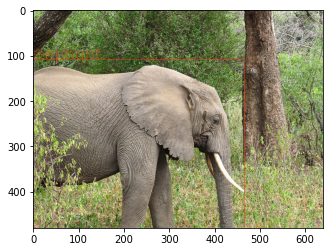

In [34]:
plt.imshow(output)